In [1]:
import csv
import nltk
import string
import pandas as pd
from collections import Counter
import sklearn
from itertools import dropwhile
lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()
stopwords=nltk.corpus.stopwords.words('english')

## Read CSV file 

In [104]:
def csv_to_df(path):
    df = pd.read_csv(path)
    df = df[[df.columns[-1]]]
    df = df.dropna(axis=0)
    return df

def sort_by_rating_count_csv(path):
    df = pd.read_csv(path)
    df = df[[df.columns[-4],df.columns[-1]]]
    df = df.dropna(axis=0)
    df = df.sort_values("rating_count", ascending=False)
    return df

def sort_by_date_csv(path):
    df = pd.read_csv(path)
    df = df[[df.columns[-7],df.columns[-1]]]
    df = df.dropna(axis = 0)
    df = df[df.publication_date != '//']
    df["publication_date"] = df["publication_date"].apply(lambda x: x[-4:])
    df = df.sort_values("publication_date", ascending=False)
    # remove rows without date
    return df

## Functions for processing df description -> list of lemmatized words

In [36]:
def process(text, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    text = text.lower()
    text = text.replace("'s", "")
    text = text.replace("'", "")
    for char in text: 
        if (char in string.punctuation): text = text.replace(char, " ")
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words = [word for word in words if word not in stopwords]
    return filtered_words

def process_all(df, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    for i, row in df.iterrows():
        original = row['description']
        df.at[i, 'description'] = process(original)
    return df

## Most poular words in general, and 20 most common words below

In [109]:
def get_rare_words(processed):
    fin = []
    for i, row in processed.iterrows():
        fin.extend(row['description'])
    count = Counter(fin)
    return count

counter_all = Counter()
for i in range(1,11):
    df = csv_to_df('metadata/metadata%d.csv'%(i))
    processed = process_all(df)
    rare = get_rare_words(processed)
    counter_all += rare

In [42]:
print(counter_all.most_common(20))

[('life', 15917), ('book', 15651), ('ha', 15297), ('one', 14051), ('new', 13940), ('’', 13253), ('wa', 11994), ('de', 11750), ('world', 11615), ('story', 10775), ('time', 10179), ('work', 8836), ('first', 8165), ('year', 7972), ('la', 7450), ('love', 6339), ('woman', 6054), ('history', 5843), ('novel', 5821), ('man', 5682)]


## Most popular words, grouped by rating

In [45]:
import matplotlib.pyplot as plt 
%matplotlib inline

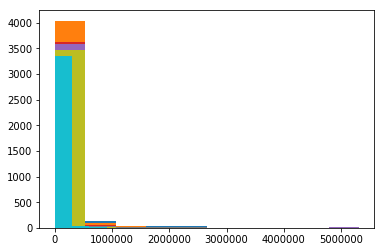

In [55]:
for x in range(1,11):
    df = sort_by_rating_count_csv('metadata/metadata%d.csv'%(x))
    plt.hist(df['rating_count'])
#     print(df['rating_count'].describe())

In [76]:
def get_rare_words_rating(processed):
    R0_100k, R100k_200k,  R200k_300k,  R300k_400k, R400k_500k,  R500k_600k, R600k_700k, \
    R700k_800k, R800k_900k, R900k_1000k, R1000k_3000k, R3000kabove \
                = [], [], [], [], [], [], [], [], [], [], [], []
    for i, row in processed.iterrows():
        if (0 < row['rating_count'] < 100000): R0_100k.extend(row['description'])
        elif (100000 < row['rating_count'] < 200000): R100k_200k.extend(row['description'])
        elif (200000 < row['rating_count'] < 300000): R200k_300k.extend(row['description'])
        elif (300000 < row['rating_count'] < 400000): R300k_400k.extend(row['description'])
        elif (400000 < row['rating_count'] < 500000): R400k_500k.extend(row['description'])
        elif (500000 < row['rating_count'] < 600000): R500k_600k.extend(row['description'])
        elif (600000 < row['rating_count'] < 700000): R600k_700k.extend(row['description'])
        elif (700000 < row['rating_count'] < 800000): R700k_800k.extend(row['description'])
        elif (800000 < row['rating_count'] < 900000): R800k_900k.extend(row['description'])
        elif (900000 < row['rating_count'] < 1000000): R900k_1000k.extend(row['description'])
        elif (1000000 < row['rating_count'] < 3000000): R1000k_3000k.extend(row['description'])
        elif (3000000 < row['rating_count']): R3000kabove.extend(row['description'])
            
    return Counter(R0_100k), Counter(R100k_200k), Counter(R200k_300k), Counter(R300k_400k), \
            Counter(R400k_500k), Counter(R500k_600k), Counter(R600k_700k), Counter(R700k_800k), \
            Counter(R800k_900k), Counter(R900k_1000k), Counter(R1000k_3000k), Counter(R3000kabove)

In [77]:
R0_100k, R100k_200k,  R200k_300k,  R300k_400k, R400k_500k,  R500k_600k, R600k_700k, \
    R700k_800k, R800k_900k, R900k_1000k, R1000k_3000k, R3000kabove \
        = Counter(), Counter(), Counter(), Counter(), Counter(), Counter(), Counter(), Counter(),\
            Counter(), Counter(), Counter(), Counter()
for x in range(10):
    df = sort_by_rating_count_csv('metadata/metadata%d.csv'%(x+1))
    processed = process_all(df)
    a, b, c, d, e, f, g, h, i, j, k, l = get_rare_words_rating(processed)
    R0_100k += a
    R100k_200k += b
    R200k_300k += c
    R300k_400k += d
    R400k_500k += e
    R500k_600k += f
    R600k_700k += g
    R700k_800k += h
    R800k_900k += i
    R900k_1000k += j
    R1000k_3000k += k
    R3000kabove += l

In [78]:
print(R0_100k.most_common(10))
print(R100k_200k.most_common(10))
print(R200k_300k.most_common(10))
print(R300k_400k.most_common(10))
print(R400k_500k.most_common(10))
print(R500k_600k.most_common(10))
print(R600k_700k.most_common(10))
print(R700k_800k.most_common(10))
print(R800k_900k.most_common(10))
print(R900k_1000k.most_common(10))
print(R1000k_3000k.most_common(10))
print(R3000kabove.most_common(10))

[('life', 14621), ('book', 14224), ('ha', 13747), ('new', 12870), ('one', 12587), ('’', 12178), ('wa', 10830), ('world', 10467), ('de', 9761), ('story', 9694)]
[('de', 697), ('ha', 638), ('one', 469), ('life', 445), ('la', 415), ('new', 390), ('world', 388), ('’', 388), ('wa', 380), ('book', 357)]
[('de', 273), ('one', 216), ('ha', 193), ('la', 175), ('’', 153), ('story', 152), ('world', 147), ('life', 144), ('new', 130), ('book', 120)]
[('book', 162), ('de', 140), ('la', 100), ('life', 91), ('’', 84), ('world', 80), ('wa', 79), ('one', 74), ('story', 74), ('ha', 69)]
[('ring', 168), ('one', 127), ('de', 115), ('ha', 107), ('edition', 90), ('lord', 88), ('book', 80), ('story', 73), ('frank', 69), ('que', 68)]
[('life', 105), ('story', 97), ('world', 84), ('novel', 83), ('one', 72), ('ha', 63), ('edition', 60), ('’', 58), ('book', 54), ('new', 49)]
[('de', 65), ('one', 62), ('la', 50), ('life', 34), ('classic', 33), ('year', 33), ('wild', 31), ('novel', 30), ('ha', 29), ('book', 28)]
[(

## Most popular words over time

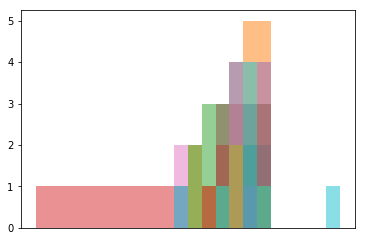

In [111]:
# fig = plt.figure()
for x in range(1,11):
    df = sort_by_date_csv('metadata/metadata%d.csv'%(x))
#     print(Counter(df["publication_date"]))
    plt.hist(df["publication_date"], alpha=0.5, \
             bins=[1800,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])
#     df["publication_date"].hist()
#     ax = fig.add_subplot(df["publication_date"])

## Most poular words by rating for REVIEWS

In [119]:
def review_csv_to_df(path):
    df = pd.read_csv(path)
    df = df.dropna(axis=0)
    return df

In [138]:
def review_process(text, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    text = text.lower()
    text = text.replace("'s", "")
    text = text.replace("'", "")
    for char in text: 
        if (char in string.punctuation): text = text.replace(char, " ")
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    filtered_words = [word for word in words if word not in stopwords]
    return filtered_words

def review_process_all(df, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    for i, row in df.iterrows():
        original = row['text']
        df.at[i, 'text'] = review_process(original)
    return df

def review_get_rare_words(processed):
    one, two, three, four, five = [], [], [], [], []
    for i, row in processed.iterrows():
        if (row['rating'] == 1.0): one.extend(row['text'])
        elif (row['rating'] == 2.0): two.extend(row['text'])
        elif (row['rating'] == 3.0): three.extend(row['text'])
        elif (row['rating'] == 4.0): four.extend(row['text'])
        elif (row['rating'] == 5.0): five.extend(row['text'])
    return Counter(one), Counter(two), Counter(three), Counter(four), Counter(five)

In [139]:
one, two, three, four, five = Counter(), Counter(), Counter(), Counter(), Counter()
for i in range(1,3):
    df = review_csv_to_df('reviews%d.csv'%(i))
#     df = review_csv_to_df('reviews1.csv')
    processed = review_process_all(df)
    a, b, c, d, e = review_get_rare_words(processed)
    one += a
    two += b
    three += c
    four += d
    five += e

In [141]:
print("rating one :   ")
print(one.most_common(30))
print("\n")
print("rating two :   ")
print(two.most_common(30))
print("\n")
print("rating three :   ")
print(three.most_common(30))
print("\n")
print("rating four :   ")
print(four.most_common(30))
print("\n")
print("rating five :   ")
print(five.most_common(30))

rating one :   
[('book', 24507), ('wa', 15510), ('read', 9576), ('like', 5836), ('one', 5778), ('really', 3641), ('reading', 3559), ('story', 3541), ('character', 3481), ('time', 3358), ('first', 3142), ('get', 2947), ('would', 2942), ('im', 2839), ('dont', 2711), ('page', 2652), ('didnt', 2583), ('’', 2370), ('much', 2370), ('author', 2369), ('good', 2358), ('ha', 2336), ('even', 2250), ('think', 2245), ('know', 2130), ('novel', 2090), ('people', 2081), ('could', 1984), ('ever', 1920), ('writing', 1917)]


rating two :   
[('book', 34378), ('wa', 27696), ('read', 14547), ('like', 9750), ('one', 9525), ('story', 8653), ('really', 7051), ('character', 5933), ('time', 5600), ('first', 5547), ('much', 5382), ('reading', 5313), ('good', 4929), ('didnt', 4658), ('’', 4624), ('would', 4545), ('ha', 4497), ('im', 4318), ('novel', 4297), ('get', 4217), ('think', 3958), ('interesting', 3723), ('author', 3585), ('dont', 3577), ('well', 3438), ('love', 3297), ('way', 3291), ('de', 3180), ('writi